
Importing necessary libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score , root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [2]:
#Loading the dataset
df = pd.read_csv('Sample Dataset.csv')



Checking for basic information about the dataset

In [3]:
print("\nDataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              99 non-null     object
 1   Year               99 non-null     int64 
 2   Model              99 non-null     object
 3   Car/Suv            99 non-null     object
 4   Title              99 non-null     object
 5   UsedOrNew          99 non-null     object
 6   Transmission       99 non-null     object
 7   Engine             99 non-null     object
 8   DriveType          99 non-null     object
 9   FuelType           99 non-null     object
 10  FuelConsumption    99 non-null     object
 11  Kilometres         99 non-null     int64 
 12  ColourExtInt       99 non-null     object
 13  Location           99 non-null     object
 14  CylindersinEngine  99 non-null     object
 15  BodyType           95 non-null     object
 16  Doors              85 non-null 

In [4]:
print("\nDataset Description:")
print(df['Price'].describe())

print("\nFirst few rows of the dataset:")
print(df.head())


Dataset Description:
count        99.000000
mean      24070.656566
std       16478.780991
min        2995.000000
25%       13997.000000
50%       19888.000000
75%       27687.500000
max      108988.000000
Name: Price, dtype: float64

First few rows of the dataset:
           Brand  Year   Model               Car/Suv  \
0      Ssangyong  2022  Rexton  Sutherland Isuzu Ute   
1             MG  2022     MG3             Hatchback   
2            BMW  2022    430I                 Coupe   
3  Mercedes-Benz  2011    E500                 Coupe   
4        Renault  2022  Arkana                   SUV   

                                       Title UsedOrNew Transmission  \
0       2022 Ssangyong Rexton Ultimate (awd)      DEMO    Automatic   
1  2022 MG MG3 Auto Excite (with Navigation)      USED    Automatic   
2                      2022 BMW 430I M Sport      USED    Automatic   
3           2011 Mercedes-Benz E500 Elegance      USED    Automatic   
4                 2022 Renault Arkana Inte

Checking for missing values and outliers

In [5]:

print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Brand                 0
Year                  0
Model                 0
Car/Suv               0
Title                 0
UsedOrNew             0
Transmission          0
Engine                0
DriveType             0
FuelType              0
FuelConsumption       0
Kilometres            0
ColourExtInt          0
Location              0
CylindersinEngine     0
BodyType              4
Doors                14
Seats                14
Price                 0
dtype: int64


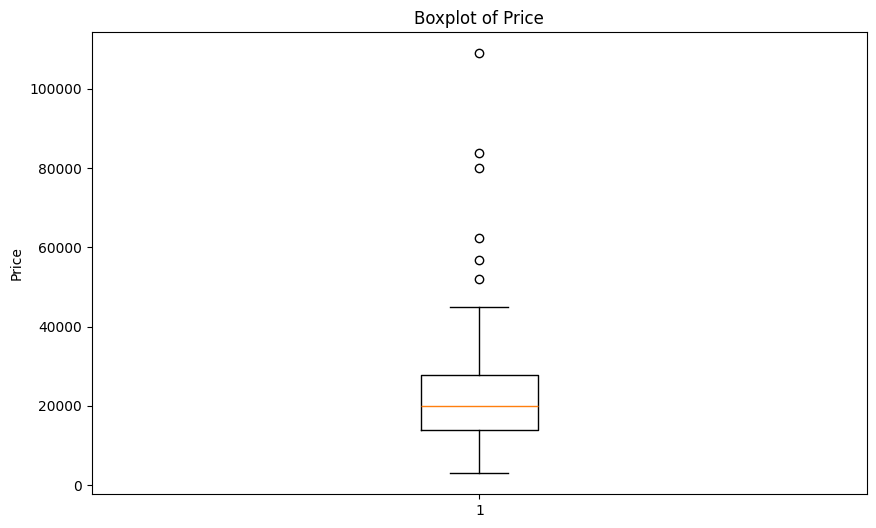

In [6]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Price'])
plt.title('Boxplot of Price')
plt.ylabel('Price')
plt.show()

SELECT ONLY USEFUL ONES

In [7]:
df = df[df['Price'] < 50000]

In [8]:

features = ['Brand', 'Year', 'Model', 'Car/Suv', 'UsedOrNew', 
            'Transmission', 'Engine', 'DriveType', 'FuelType', 
            'FuelConsumption', 'Kilometres', 'CylindersinEngine','Location']
target = 'Price'

In [9]:

df_model = df[features + [target]].copy()
df_model.head()

,Brand,Year,Model,Car/Suv,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,Location,Price
1,MG,2022,MG3,Hatchback,USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,4 cyl,"Brookvale, NSW",19990
3,Mercedes-Benz,2011,E500,Coupe,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,8 cyl,"Mount Druitt, NSW",32990
4,Renault,2022,Arkana,SUV,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,4 cyl,"Castle Hill, NSW",34990
5,Toyota,2004,Estima,ON FOUR WHEELS,USED,Automatic,-,Other,Unleaded,-,160230,-,"Saint Marys, NSW",9990
7,Nissan,2000,Pulsar,Hatchback,USED,Automatic,"4 cyl, 1.6 L",Front,Unleaded,8 L / 100 km,300539,4 cyl,"Wentworthville, NSW",2995


Handling non-integer features

In [10]:
numerical_features = ['Year', 'Kilometres']
categorical_features = ['Brand', 'Model', 'Car/Suv', 'UsedOrNew', 'FuelConsumption',
                        'Transmission', 'Engine', 'DriveType', 'FuelType', 'Location','CylindersinEngine']


In [11]:
df_model = df[numerical_features + categorical_features + [target]].copy()

In [12]:
print("\nPrepared DataFrame for Modeling:")
print(df_model.head())
print("\n Data type info:")
print(df_model.dtypes)  


Prepared DataFrame for Modeling:
   Year  Kilometres          Brand   Model         Car/Suv UsedOrNew  \
1  2022          16             MG     MG3       Hatchback      USED   
3  2011      136517  Mercedes-Benz    E500           Coupe      USED   
4  2022        1035        Renault  Arkana             SUV      USED   
5  2004      160230         Toyota  Estima  ON FOUR WHEELS      USED   
7  2000      300539         Nissan  Pulsar       Hatchback      USED   

  FuelConsumption Transmission        Engine DriveType  FuelType  \
1  6.7 L / 100 km    Automatic  4 cyl, 1.5 L     Front   Premium   
3   11 L / 100 km    Automatic  8 cyl, 5.5 L      Rear   Premium   
4    6 L / 100 km    Automatic  4 cyl, 1.3 L     Front  Unleaded   
5               -    Automatic             -     Other  Unleaded   
7    8 L / 100 km    Automatic  4 cyl, 1.6 L     Front  Unleaded   

              Location CylindersinEngine  Price  
1       Brookvale, NSW             4 cyl  19990  
3    Mount Druitt, NSW  

In [13]:
df_model = pd.get_dummies(df_model, columns=categorical_features, drop_first=True)


In [14]:
#
df_model.head()

,Year,Kilometres,Price,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Holden,Brand_Honda,Brand_Hyundai,Brand_Jeep,...,"Location_Saint Marys, NSW","Location_Seven Hills, NSW","Location_Smithfield, NSW","Location_Wentworthville, NSW","Location_West Ryde, NSW",CylindersinEngine_3 cyl,CylindersinEngine_4 cyl,CylindersinEngine_5 cyl,CylindersinEngine_6 cyl,CylindersinEngine_8 cyl
1,2022,16,19990,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,2011,136517,32990,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2022,1035,34990,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,2004,160230,9990,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
7,2000,300539,2995,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False


In [15]:
print("Data after one-hot encoding:")
print(df_model.columns.tolist())

print("Total columns after encoding:", len(df_model.columns))

Data after one-hot encoding:
['Year', 'Kilometres', 'Price', 'Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Holden', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Jeep', 'Brand_Kia', 'Brand_MG', 'Brand_Mazda', 'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Peugeot', 'Brand_Renault', 'Brand_Subaru', 'Brand_Toyota', 'Brand_Volkswagen', 'Brand_Volvo', 'Model_118I', 'Model_220I', 'Model_3', 'Model_308', 'Model_595', 'Model_6', 'Model_86', 'Model_A250', 'Model_A5', 'Model_ASX', 'Model_Arkana', 'Model_BT-50', 'Model_C-CLASS', 'Model_CR-V', 'Model_CX-5', 'Model_CX-7', 'Model_Camry', 'Model_Cascada', 'Model_Cherokee', 'Model_City', 'Model_Commodore', 'Model_Cooper', 'Model_Corolla', 'Model_E250', 'Model_E500', 'Model_Elgrand', 'Model_Estima', 'Model_Falcon', 'Model_Fiesta', 'Model_Focus', 'Model_Golf', 'Model_Grand', 'Model_HiAce', 'Model_I20', 'Model_I30', 'Model_I45', 'Model_Imax', 'Model_Impreza', 'Model_Jazz', 'Model_Kluger', 'Model_Lancer', 'Model_MG3', 'Model_M

 Separate features (X) and target (y)

In [16]:
X = df_model.drop('Price', axis=1)
Y = df_model['Price']

print("Features shape:", X.shape)
print("Target shape:", Y.shape)
print("First few rows of features:", X.head())

Features shape: (93, 214)
Target shape: (93,)
First few rows of features:    Year  Kilometres  Brand_Audi  Brand_BMW  Brand_Ford  Brand_Holden  \
1  2022          16       False      False       False         False   
3  2011      136517       False      False       False         False   
4  2022        1035       False      False       False         False   
5  2004      160230       False      False       False         False   
7  2000      300539       False      False       False         False   

   Brand_Honda  Brand_Hyundai  Brand_Jeep  Brand_Kia  ...  \
1        False          False       False      False  ...   
3        False          False       False      False  ...   
4        False          False       False      False  ...   
5        False          False       False      False  ...   
7        False          False       False      False  ...   

   Location_Saint Marys, NSW  Location_Seven Hills, NSW  \
1                      False                      False   
3       

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Training features shape:", len(X_train))
print("Testing features shape:", len(X_test))

Training features shape: 74
Testing features shape: 19


Training the model and making prediction?

In [18]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)
print("Model training completed.")


Model training completed.


In [19]:
y_pred = model.predict(X_test)

In [20]:
r2 = r2_score(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
print("RANDOM FOREST MODEL PERFORMANCE:")

print(f"\nR² Score: {r2:.4f}")
print(f"Mean Absolute Error: ${mae:,.2f}")
print(f"Root Mean Squared Error: ${rmse:,.2f}")


RANDOM FOREST MODEL PERFORMANCE:

R² Score: 0.6619
Mean Absolute Error: $4,838.17
Root Mean Squared Error: $5,799.18
